git remote add origin https://github.com/Wilasinee31/My-project-CPE372.git
git branch -M main
git push -u origin main

In [1]:
from nltk.util import bigrams
from nltk.lm.preprocessing import pad_both_ends
from nltk import word_tokenize, WhitespaceTokenizer
from nltk.util import ngrams
import pandas as pd
import random
# from nltk.lm.preprocessing import padded_everygram_pipeline

## Overview

In [2]:
import pandas as pd
df = pd.read_csv(r'Downloads/starbucks_df/starbucks_drinkMenu_expanded.csv')
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [4]:
#df

## Clean

In [5]:
import pandas as pd
df = pd.read_csv(r'Downloads/starbucks_df/starbucks_drinkMenu_expanded.csv')
#df.drop(['Calories','Fat (g)','Carb. (g)','Fiber (g)','Protein','Sodium'],inplace=True, axis=1)
#df.rename(columns = {'Unnamed: 0':'Menu'}, inplace = True)
df.drop(['Calories',' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],inplace=True, axis=1)
df.head(10)

,Beverage_category,Beverage,Beverage_prep
0,Coffee,Brewed Coffee,Short
1,Coffee,Brewed Coffee,Tall
2,Coffee,Brewed Coffee,Grande
3,Coffee,Brewed Coffee,Venti
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk
5,Classic Espresso Drinks,Caffè Latte,2% Milk
6,Classic Espresso Drinks,Caffè Latte,Soymilk
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk
8,Classic Espresso Drinks,Caffè Latte,2% Milk
9,Classic Espresso Drinks,Caffè Latte,Soymilk


In [6]:
df['Clean_category']= df['Beverage_category'].apply(lambda x: x.lower())
df['Clean_Beverage']= df['Beverage'].apply(lambda x: x.lower())
df['Clean_Beverage_prep']= df['Beverage_prep'].apply(lambda x: x.lower())
new1 = df['Clean_Beverage'].copy()
new2 =df['Clean_Beverage_prep'].copy()
df.head(10)

,Beverage_category,Beverage,Beverage_prep,Clean_category,Clean_Beverage,Clean_Beverage_prep
0,Coffee,Brewed Coffee,Short,coffee,brewed coffee,short
1,Coffee,Brewed Coffee,Tall,coffee,brewed coffee,tall
2,Coffee,Brewed Coffee,Grande,coffee,brewed coffee,grande
3,Coffee,Brewed Coffee,Venti,coffee,brewed coffee,venti
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,classic espresso drinks,caffè latte,short nonfat milk
5,Classic Espresso Drinks,Caffè Latte,2% Milk,classic espresso drinks,caffè latte,2% milk
6,Classic Espresso Drinks,Caffè Latte,Soymilk,classic espresso drinks,caffè latte,soymilk
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,classic espresso drinks,caffè latte,tall nonfat milk
8,Classic Espresso Drinks,Caffè Latte,2% Milk,classic espresso drinks,caffè latte,2% milk
9,Classic Espresso Drinks,Caffè Latte,Soymilk,classic espresso drinks,caffè latte,soymilk


In [7]:
df["all_Menu"]= df["Clean_category"].str.cat(new1, sep =" ")
df["Menu"]= df["all_Menu"].str.cat(new2, sep =" ")
df.drop(['Beverage_category','Beverage','Beverage_prep','Clean_category','Clean_Beverage','Clean_Beverage_prep','all_Menu'],inplace=True, axis=1)

In [8]:
df['Tokens']=df['Menu'].apply(lambda x: word_tokenize(x))
df.head(10)

,Menu,Tokens
0,coffee brewed coffee short,"[coffee, brewed, coffee, short]"
1,coffee brewed coffee tall,"[coffee, brewed, coffee, tall]"
2,coffee brewed coffee grande,"[coffee, brewed, coffee, grande]"
3,coffee brewed coffee venti,"[coffee, brewed, coffee, venti]"
4,classic espresso drinks caffè latte short nonf...,"[classic, espresso, drinks, caffè, latte, shor..."
5,classic espresso drinks caffè latte 2% milk,"[classic, espresso, drinks, caffè, latte, 2, %..."
6,classic espresso drinks caffè latte soymilk,"[classic, espresso, drinks, caffè, latte, soym..."
7,classic espresso drinks caffè latte tall nonfa...,"[classic, espresso, drinks, caffè, latte, tall..."
8,classic espresso drinks caffè latte 2% milk,"[classic, espresso, drinks, caffè, latte, 2, %..."
9,classic espresso drinks caffè latte soymilk,"[classic, espresso, drinks, caffè, latte, soym..."


In [9]:
df['Pad_end_Menu']=df['Tokens'].apply(lambda x: list(pad_both_ends(x,n= 2)))
df['Clean_Menu']=df['Pad_end_Menu']
df

,Menu,Tokens,Pad_end_Menu,Clean_Menu
0,coffee brewed coffee short,"[coffee, brewed, coffee, short]","[<s>, coffee, brewed, coffee, short, </s>]","[<s>, coffee, brewed, coffee, short, </s>]"
1,coffee brewed coffee tall,"[coffee, brewed, coffee, tall]","[<s>, coffee, brewed, coffee, tall, </s>]","[<s>, coffee, brewed, coffee, tall, </s>]"
2,coffee brewed coffee grande,"[coffee, brewed, coffee, grande]","[<s>, coffee, brewed, coffee, grande, </s>]","[<s>, coffee, brewed, coffee, grande, </s>]"
3,coffee brewed coffee venti,"[coffee, brewed, coffee, venti]","[<s>, coffee, brewed, coffee, venti, </s>]","[<s>, coffee, brewed, coffee, venti, </s>]"
4,classic espresso drinks caffè latte short nonf...,"[classic, espresso, drinks, caffè, latte, shor...","[<s>, classic, espresso, drinks, caffè, latte,...","[<s>, classic, espresso, drinks, caffè, latte,..."
...,...,...,...,...
237,frappuccino® blended crème strawberries & crèm...,"[frappuccino®, blended, crème, strawberries, &...","[<s>, frappuccino®, blended, crème, strawberri...","[<s>, frappuccino®, blended, crème, strawberri..."
238,frappuccino® blended crème vanilla bean (witho...,"[frappuccino®, blended, crème, vanilla, bean, ...","[<s>, frappuccino®, blended, crème, vanilla, b...","[<s>, frappuccino®, blended, crème, vanilla, b..."
239,frappuccino® blended crème vanilla bean (witho...,"[frappuccino®, blended, crème, vanilla, bean, ...","[<s>, frappuccino®, blended, crème, vanilla, b...","[<s>, frappuccino®, blended, crème, vanilla, b..."
240,frappuccino® blended crème vanilla bean (witho...,"[frappuccino®, blended, crème, vanilla, bean, ...","[<s>, frappuccino®, blended, crème, vanilla, b...","[<s>, frappuccino®, blended, crème, vanilla, b..."


In [10]:
#from nltk.corpus import stopwords
#stop = stopwords.words('english')
#df['Token_stw']=df['Clean_Menu'].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))
#df

## Count n-grams

In [11]:
def count_n_grams(corpus, n):
    n_grams = {}
    for sentence in corpus:
        sentence = ['<s>']*n + sentence + ['</s>']
        sentence = tuple(sentence)
        for i in range(len(sentence)-(n-1)):
            n_gram = sentence[i:i+n]
            # Check n-gram is in the dictionary
            if n_gram in n_grams:
                n_grams[n_gram] += 1
            else:
                n_grams[n_gram] = 1
    return n_grams
count_n_grams(df['Clean_Menu'], 2)

{('<s>', '<s>'): 484,
 ('<s>', 'coffee'): 4,
 ('coffee', 'brewed'): 4,
 ('brewed', 'coffee'): 16,
 ('coffee', 'short'): 1,
 ('short', '</s>'): 4,
 ('</s>', '</s>'): 242,
 ('coffee', 'tall'): 3,
 ('tall', '</s>'): 7,
 ('coffee', 'grande'): 3,
 ('grande', '</s>'): 7,
 ('coffee', 'venti'): 3,
 ('venti', '</s>'): 7,
 ('<s>', 'classic'): 58,
 ('classic', 'espresso'): 58,
 ('espresso', 'drinks'): 98,
 ('drinks', 'caffè'): 28,
 ('caffè', 'latte'): 12,
 ('latte', 'short'): 4,
 ('short', 'nonfat'): 12,
 ('nonfat', 'milk'): 83,
 ('milk', '</s>'): 149,
 ('latte', '2'): 16,
 ('2', '%'): 50,
 ('%', 'milk'): 50,
 ('latte', 'soymilk'): 16,
 ('soymilk', '</s>'): 66,
 ('latte', 'tall'): 4,
 ('tall', 'nonfat'): 23,
 ('latte', 'grande'): 4,
 ('grande', 'nonfat'): 26,
 ('latte', 'venti'): 4,
 ('venti', 'nonfat'): 22,
 ('caffè', 'mocha'): 12,
 ('mocha', '('): 33,
 ('(', 'without'): 80,
 ('without', 'whipped'): 80,
 ('whipped', 'cream'): 80,
 ('cream', ')'): 80,
 (')', 'short'): 7,
 (')', '2'): 23,
 (')', '

In [12]:
count_gram= count_n_grams(df['Clean_Menu'], 3)
count_gram

{('<s>', '<s>', '<s>'): 484,
 ('<s>', '<s>', 'coffee'): 4,
 ('<s>', 'coffee', 'brewed'): 4,
 ('coffee', 'brewed', 'coffee'): 4,
 ('brewed', 'coffee', 'short'): 1,
 ('coffee', 'short', '</s>'): 1,
 ('short', '</s>', '</s>'): 4,
 ('brewed', 'coffee', 'tall'): 1,
 ('coffee', 'tall', '</s>'): 1,
 ('tall', '</s>', '</s>'): 7,
 ('brewed', 'coffee', 'grande'): 1,
 ('coffee', 'grande', '</s>'): 1,
 ('grande', '</s>', '</s>'): 7,
 ('brewed', 'coffee', 'venti'): 1,
 ('coffee', 'venti', '</s>'): 1,
 ('venti', '</s>', '</s>'): 7,
 ('<s>', '<s>', 'classic'): 58,
 ('<s>', 'classic', 'espresso'): 58,
 ('classic', 'espresso', 'drinks'): 58,
 ('espresso', 'drinks', 'caffè'): 28,
 ('drinks', 'caffè', 'latte'): 12,
 ('caffè', 'latte', 'short'): 1,
 ('latte', 'short', 'nonfat'): 4,
 ('short', 'nonfat', 'milk'): 12,
 ('nonfat', 'milk', '</s>'): 83,
 ('milk', '</s>', '</s>'): 149,
 ('caffè', 'latte', '2'): 4,
 ('latte', '2', '%'): 16,
 ('2', '%', 'milk'): 50,
 ('%', 'milk', '</s>'): 50,
 ('caffè', 'latte', 

## Model

In [13]:
df.head()

,Menu,Tokens,Pad_end_Menu,Clean_Menu
0,coffee brewed coffee short,"[coffee, brewed, coffee, short]","[<s>, coffee, brewed, coffee, short, </s>]","[<s>, coffee, brewed, coffee, short, </s>]"
1,coffee brewed coffee tall,"[coffee, brewed, coffee, tall]","[<s>, coffee, brewed, coffee, tall, </s>]","[<s>, coffee, brewed, coffee, tall, </s>]"
2,coffee brewed coffee grande,"[coffee, brewed, coffee, grande]","[<s>, coffee, brewed, coffee, grande, </s>]","[<s>, coffee, brewed, coffee, grande, </s>]"
3,coffee brewed coffee venti,"[coffee, brewed, coffee, venti]","[<s>, coffee, brewed, coffee, venti, </s>]","[<s>, coffee, brewed, coffee, venti, </s>]"
4,classic espresso drinks caffè latte short nonf...,"[classic, espresso, drinks, caffè, latte, shor...","[<s>, classic, espresso, drinks, caffè, latte,...","[<s>, classic, espresso, drinks, caffè, latte,..."


In [14]:
#from nltk.corpus import stopwords
#stop = stopwords.words('english')
#df['Token_stw']=df['Clean_Menu'].apply(lambda x: ','.join([word for word in x if word not in (stop)]))
#df

In [15]:
menu_str = ''
tk = WhitespaceTokenizer()
for innerlist in df['Clean_Menu']:
    menu_str+= ' '.join(innerlist)+','
    token_str = tk.tokenize(menu_str)
token_str
#menu_str

['<s>',
 'coffee',
 'brewed',
 'coffee',
 'short',
 '</s>,<s>',
 'coffee',
 'brewed',
 'coffee',
 'tall',
 '</s>,<s>',
 'coffee',
 'brewed',
 'coffee',
 'grande',
 '</s>,<s>',
 'coffee',
 'brewed',
 'coffee',
 'venti',
 '</s>,<s>',
 'classic',
 'espresso',
 'drinks',
 'caffè',
 'latte',
 'short',
 'nonfat',
 'milk',
 '</s>,<s>',
 'classic',
 'espresso',
 'drinks',
 'caffè',
 'latte',
 '2',
 '%',
 'milk',
 '</s>,<s>',
 'classic',
 'espresso',
 'drinks',
 'caffè',
 'latte',
 'soymilk',
 '</s>,<s>',
 'classic',
 'espresso',
 'drinks',
 'caffè',
 'latte',
 'tall',
 'nonfat',
 'milk',
 '</s>,<s>',
 'classic',
 'espresso',
 'drinks',
 'caffè',
 'latte',
 '2',
 '%',
 'milk',
 '</s>,<s>',
 'classic',
 'espresso',
 'drinks',
 'caffè',
 'latte',
 'soymilk',
 '</s>,<s>',
 'classic',
 'espresso',
 'drinks',
 'caffè',
 'latte',
 'grande',
 'nonfat',
 'milk',
 '</s>,<s>',
 'classic',
 'espresso',
 'drinks',
 'caffè',
 'latte',
 '2',
 '%',
 'milk',
 '</s>,<s>',
 'classic',
 'espresso',
 'drinks',
 'c

In [526]:
def make_markov_model(menu, n_gram):
    markov_model = {}
    for i in range(len(menu)-n_gram-1):
        curr_state, next_state = "", ""
        for j in range(n_gram):
            curr_state += menu[i+j] + " "
            next_state += menu[i+j+n_gram] + " "
        curr_state = curr_state[:-1]
        next_state = next_state[:-1]
        if curr_state not in markov_model:
            markov_model[curr_state] = {}
            markov_model[curr_state][next_state] = 1
        else:
            if next_state in markov_model[curr_state]:
                markov_model[curr_state][next_state] += 1
            else:
                markov_model[curr_state][next_state] = 1
    
    # calculating transition probabilities
    for curr_state, transition in markov_model.items():
        total = sum(transition.values())
        for state, count in transition.items():
            markov_model[curr_state][state] = count/total
            
    return markov_model
markov_model = make_markov_model(token_str,n_gram=2)
markov_model


{'<s> coffee': {'brewed coffee': 1.0},
 'coffee brewed': {'coffee short': 0.25,
  'coffee tall': 0.25,
  'coffee grande': 0.25,
  'coffee venti': 0.25},
 'brewed coffee': {'short </s>,<s>': 0.0625,
  'tall </s>,<s>': 0.0625,
  'grande </s>,<s>': 0.0625,
  'venti </s>,<s>': 0.0625,
  '( with': 0.75},
 'coffee short': {'</s>,<s> coffee': 1.0},
 'short </s>,<s>': {'coffee brewed': 0.25,
  'classic espresso': 0.25,
  'signature espresso': 0.25,
  'tazo® tea': 0.25},
 '</s>,<s> coffee': {'brewed coffee': 1.0},
 'coffee tall': {'</s>,<s> coffee': 0.3333333333333333,
  'nonfat milk': 0.6666666666666666},
 'tall </s>,<s>': {'coffee brewed': 0.14285714285714285,
  'classic espresso': 0.14285714285714285,
  'signature espresso': 0.14285714285714285,
  'tazo® tea': 0.14285714285714285,
  'shaken iced': 0.42857142857142855},
 'coffee grande': {'</s>,<s> coffee': 0.3333333333333333,
  'nonfat milk': 0.6666666666666666},
 'grande </s>,<s>': {'coffee brewed': 0.14285714285714285,
  'classic espresso'

In [527]:
def make_markov_model(menu, n_gram):
    markov_model = {}
    for i in range(len(menu)-n_gram-1):
        curr_state, next_state = "", ""
        for j in range(n_gram):
            curr_state += menu[i+j] + " "
            next_state += menu[i+j+n_gram] + " "
        curr_state = curr_state[:-1]
        next_state = next_state[:-1]
        if curr_state not in markov_model:
            markov_model[curr_state] = {}
            markov_model[curr_state][next_state] = 1
        else:
            if next_state in markov_model[curr_state]:
                markov_model[curr_state][next_state] += 1
            else:
                markov_model[curr_state][next_state] = 1
    
    # calculating transition probabilities
    for curr_state, transition in markov_model.items():
        total = sum(transition.values())
        for state, count in transition.items():
            markov_model[curr_state][state] = count/total
            
    return markov_model
markov_model = make_markov_model(token_str,n_gram=1)
markov_model


{'<s>': {'coffee': 1.0},
 'coffee': {'brewed': 0.05,
  'short': 0.0125,
  'tall': 0.0375,
  'grande': 0.0375,
  'venti': 0.0375,
  '(': 0.15,
  'coffee': 0.15,
  'whole': 0.0375,
  'soymilk': 0.0375,
  'mocha': 0.15,
  'caramel': 0.15,
  'java': 0.15},
 'brewed': {'coffee': 1.0},
 'short': {'</s>,<s>': 0.25, 'nonfat': 0.75},
 '</s>,<s>': {'coffee': 0.012448132780082987,
  'classic': 0.24066390041493776,
  'signature': 0.16597510373443983,
  'tazo®': 0.2157676348547718,
  'shaken': 0.07468879668049792,
  'smoothies': 0.03734439834024896,
  'frappuccino®': 0.25311203319502074},
 'tall': {'</s>,<s>': 0.23333333333333334, 'nonfat': 0.7666666666666667},
 'grande': {'</s>,<s>': 0.21212121212121213, 'nonfat': 0.7878787878787878},
 'venti': {'</s>,<s>': 0.2413793103448276, 'nonfat': 0.7586206896551724},
 'classic': {'espresso': 0.7631578947368421, 'syrup': 0.23684210526315788},
 'espresso': {'drinks': 0.98, 'solo': 0.01, 'doppio': 0.01},
 'drinks': {'caffè': 0.18666666666666668,
  'vanilla': 0

In [528]:
print("All possible transitions from 'brewed coffee: \n")
print(markov_model['coffee'])

All possible transitions from 'brewed coffee: 

{'brewed': 0.05, 'short': 0.0125, 'tall': 0.0375, 'grande': 0.0375, 'venti': 0.0375, '(': 0.15, 'coffee': 0.15, 'whole': 0.0375, 'soymilk': 0.0375, 'mocha': 0.15, 'caramel': 0.15, 'java': 0.15}


In [545]:
markov_model['americano']

{'short': 0.25, 'tall': 0.25, 'grande': 0.25, 'venti': 0.25}

# Create new menu on Starbuck

In [550]:
def generate_menu(markov_model, limit=100, start='espresso'):
    n = 0
    curr_state = start
    next_state = None
    story = ""
    story+=curr_state+" "
    while n<limit:
        next_state = random.choices(list(markov_model[curr_state].keys()),list(markov_model[curr_state].values()))
        curr_state = next_state[0]
        if curr_state == '</s>':
            story = story
        elif curr_state == '<s>':
            story = story
            story = story
        elif curr_state == "</s>,<s>":
            story = story
        else:
            story+=curr_state+" "
            n+=1 
    if '< /s >' in story :
        story = story.replace("</s>","")
    elif '<,<s>' in story :
        story = story.replace('<,<s>',"")
    elif '</s,<s' in story :
        story = story.replace('</s,<s',"")
    elif '</s>,<s>' in story :
        story = story.replace('</s>,<s>',"")
        #if curr_state == '< /s' :
         #   story.append(" ")
        #elif curr_state == "/s >":
          #  story.append(" ")
        #elif curr_state == "> ":
          #  story.append(" ")
        #elif curr_state == "s >":
          #  story.append(" ")
    return story

In [551]:
generate_menu(markov_model, start=input("What would you like to drink? :"), limit=3)

What would you like to drink? :espresso


'espresso drinks caffè mocha '

In [538]:
generate_menu(markov_model, start=input("What would you like to drink? :"), limit=3)

What would you like to drink? :espresso


'espresso drinks vanilla rooibos '

In [542]:
start = input("What would you like to drink? :")
for i in range(20):
    print(generate_menu(markov_model, start=start, limit=3))

What would you like to drink? :americano
americano short nonfat milk 
americano venti nonfat milk 
americano short shaken iced 
americano tall nonfat milk 
americano short nonfat milk 
americano venti nonfat milk 
americano tall classic espresso 
americano venti nonfat milk 
americano tall nonfat milk 
americano short nonfat milk 
americano grande nonfat milk 
americano grande nonfat milk 
americano short nonfat milk 
americano short nonfat milk 
americano venti nonfat milk 
americano tall nonfat milk 
americano tall nonfat milk 
americano tall nonfat milk 
americano short nonfat milk 
americano venti nonfat milk 


In [544]:
start = input("What would you like to drink? :")
for i in range(10):
    print(str(i)+". ", generate_menu(markov_model, start=start, limit=3))

What would you like to drink? :americano
0.  americano grande nonfat milk 
1.  americano short nonfat milk 
2.  americano venti nonfat milk 
3.  americano short nonfat milk 
4.  americano venti classic espresso 
5.  americano short nonfat milk 
6.  americano tall nonfat milk 
7.  americano venti nonfat milk 
8.  americano grande nonfat milk 
9.  americano tall nonfat milk 


## WordCloud

In [513]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from nltk.lm.preprocessing import padded_everygram_pipeline

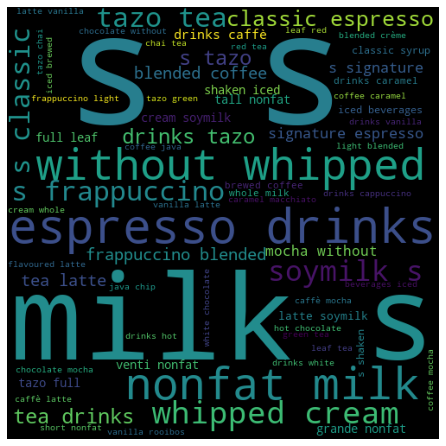

In [514]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in token_str:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 500, height = 500,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()